# K-MEANS CLUSTERING

## Ví dụ 1

In [1]:
# Gọi các thư viện cần thiết
# Ta tự xây dựng phần k-means nên sẽ không gọi sklearn

from __future__ import print_function
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial.distance import cdist
np.random.seed(11)

# Kỳ vọng và hiệp phương sai của 3 cụm dữ liệu
means = [[2, 2], [8, 3], [3, 6]]
cov = [[1, 0], [0, 1]]

# Số điểm mỗi cụm dữ liệu
N = 500

# Tạo các cụm dữ liệu qua phân bố chuẩn (Gaussian)
X0 = np.random.multivariate_normal(means[0], cov, N)
X1 = np.random.multivariate_normal(means[1], cov, N)
X2 = np.random.multivariate_normal(means[2], cov, N)
# Tổng hợp dữ liệu từ các cụm
X = np.concatenate((X0, X1, X2), axis = 0)

# Số cụm = 3
K = 3

# Gán nhãn ban đầu cho các cụm, sau đó ta test model và so sánh
original_label = np.asarray([0]*N + [1]*N + [2]*N).T

In [2]:
def kmeans_display(X, label):
    K = np.amax(label) + 1
    X0 = X[label == 0, :]
    X1 = X[label == 1, :]
    X2 = X[label == 2, :]

    plt.plot(X0[:, 0], X0[:, 1], 'b^', markersize = 4, alpha = .8)
    plt.plot(X1[:, 0], X1[:, 1], 'go', markersize = 4, alpha = .8)
    plt.plot(X2[:, 0], X2[:, 1], 'rs', markersize = 4, alpha = .8)
    
    plt.axis('equal')
    plt.plot()
    plt.show()

In [3]:
def kmeans_init_centers(X, k):
    # randomly pick k rows of X as initial centers
    return X[np.random.choice(X.shape[0], k, replace=False)]

In [4]:
def kmeans_assign_labels(X, centers):
    # calculate pairwise distances btw data and centers
    D = cdist(X, centers)
    # return index of the closest center
    return np.argmin(D, axis = 1)

In [5]:
def kmeans_update_centers(X, labels, K):
    centers = np.zeros((K, X.shape[1]))
    for k in range(K):
        # collect all points assigned to the k-th cluster
        Xk = X[labels == k, :]
        # take average
        centers[k,:] = np.mean(Xk, axis = 0)
    return centers

In [6]:
def has_converged(centers, new_centers):
    # return True if two sets of centers are the same
    return (set([tuple(a) for a in centers]) ==
            set([tuple(a) for a in new_centers]))

In [7]:
def kmeans(X, K):
    centers = [kmeans_init_centers(X, K)]
    labels = []
    it = 0
    while True:
        labels.append(kmeans_assign_labels(X, centers[-1]))
        new_centers = kmeans_update_centers(X, labels[-1], K)
        if has_converged(centers[-1], new_centers):
            break
        centers.append(new_centers)
        it += 1
    return (centers, labels, it)

Centers found by our algorithm:
[[2.99084705 6.04196062]
 [1.97563391 2.01568065]
 [8.03643517 3.02468432]]


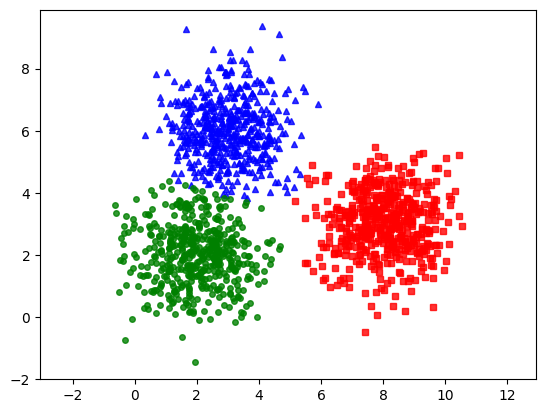

In [8]:
(centers, labels, it) = kmeans(X, K)
print('Centers found by our algorithm:')
print(centers[-1])

kmeans_display(X, labels[-1])

## Ví dụ 2

In [9]:
import os
import numpy as np

# set names to the paths because they're too long
data_path = os.path.join(os.getcwd(), 'handwriting')

# train path
train_images_path = os.path.join(data_path, 'train-images-idx3-ubyte.gz')
train_labels_path = os.path.join(data_path, 'train-labels-idx1-ubyte.gz')

# test path
test_images_path = os.path.join(data_path, 't10k-images-idx3-ubyte.gz')
test_labels_path = os.path.join(data_path, 't10k-labels-idx1-ubyte.gz')

In [10]:
def get_mnist_data(images_path,
                   labels_path,
                   num_images,
                   shuffle=False,
                   _is=True,
                   image_size=28):
    """
        This shuffle param is active when .gz is downloaded at:
            - 'http://yann.lecun.com/exdb/mnist/'
            - This function return random num_images in 60000 or 10000
    """
    # read data
    import gzip  # to decompress gz (zip) file

    # open file training to read training data
    f_images = gzip.open(images_path, 'r')

    # skip 16 first bytes because these are not data, only header infor
    f_images.read(16)

    # general: read num_images data samples if this parameter is set;
    # if not, read all (60000 training or 10000 test)
    real_num = num_images if not shuffle else (60000 if _is else 10000)

    # read all data to buf_images (28x28xreal_num)
    buf_images = f_images.read(image_size * image_size * real_num)

    # images
    images = np.frombuffer(buf_images, dtype=np.uint8).astype(np.float32)
    images = images.reshape(real_num, image_size, image_size)

    # Read labels
    f_labels = gzip.open(labels_path, 'r')
    f_labels.read(8)

    labels = np.zeros((real_num)).astype(np.int64)

    # rearrange to correspond the images and labels
    for i in range(0, real_num):
        buf_labels = f_labels.read(1)
        labels[i] = np.frombuffer(buf_labels, dtype=np.uint8).astype(np.int64)

    # shuffle to get random images data
    if shuffle is True:
        rand_id = np.random.randint(real_num, size=num_images)

        images = images[rand_id, :]
        labels = labels[rand_id, ]

    # change images data to type of vector 28x28 dimentional
    images = images.reshape(num_images, image_size * image_size)
    return images, labels

In [11]:
train_images, train_labels = get_mnist_data(train_images_path,
                                            train_labels_path,
                                            5000,
                                            shuffle=True)

print(train_images.shape, train_labels.shape)

(5000, 784) (5000,)


In [12]:
from sklearn.cluster import KMeans
import numpy as np

kmeans = KMeans(n_clusters=10, n_init=10, random_state=42)
kmeans.fit(train_images)

KMeans(n_clusters=10, n_init=10, random_state=42)

In [13]:
clusters = np.unique(kmeans.labels_)

for cluster in clusters:
    labels_in_cluster = train_labels[kmeans.labels_ == cluster]
    
    labels, counts = np.unique(labels_in_cluster, return_counts=True)
    
    print(f'Cluster {cluster}:')
    print(np.asarray([labels, counts]))
    
    max_count_idx = np.argmax(counts)
    majority = labels[max_count_idx]
    print(f'Majority: {majority}')
    
    sum = np.sum(counts)
    print(f'Proportion of other labels: {(sum - counts[max_count_idx]) / sum}')
    
    print()

Cluster 0:
[[  0   2   3   4   5   6   8   9]
 [ 13  11   5   8   1 305   2   3]]
Majority: 6
Proportion of other labels: 0.1235632183908046

Cluster 1:
[[  1   2   3   4   5   7   8   9]
 [  3   2   2 176  24 304  13 194]]
Majority: 7
Proportion of other labels: 0.5766016713091922

Cluster 2:
[[  0   1   2   3   5   6   7   8   9]
 [  3   1  17  74  71   3   1 303   3]]
Majority: 8
Proportion of other labels: 0.3634453781512605

Cluster 3:
[[  2   3   4   6   7   8   9]
 [331  13   2   4   1   7   2]]
Majority: 2
Proportion of other labels: 0.08055555555555556

Cluster 4:
[[  0   2   3   4   5   6   7   8   9]
 [296   5   2   1   4   9   3   6   1]]
Majority: 0
Proportion of other labels: 0.09480122324159021

Cluster 5:
[[  0   1   2   3   4   5   6   7   8   9]
 [  6   1  14  12 273  31   2 196  17 219]]
Majority: 4
Proportion of other labels: 0.6459143968871596

Cluster 6:
[[  0   2   3   5   8   9]
 [ 20  27 341 139  78  10]]
Majority: 3
Proportion of other labels: 0.44552845528455